In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Random Sampling

In [2]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [3]:
united.take(9)

Row,Date,Flight Number,Destination,Delay
9,6/1/15,317,IND,-10


In [7]:
united.take(9).column("Flight Number")

array([317])

In [8]:
united.item(9)

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


Row,Date,Flight Number,Destination,Delay
9,6/1/15,317,IND,-10


In [9]:
type(united.take(9))

datascience.tables.Table

In [10]:
type(united.item(9))

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


datascience.tables.Table

In [12]:
united.row(9)

Row(Row=9, Date='6/1/15', Flight Number=317, Destination='IND', Delay=-10)

In [14]:
type(united.row(9))

datascience.tables.Row

In [15]:
united.row(9).item('Flight Number')

317

In [16]:
ninth_row = united.row(9)
ninth_row.item(0)

9

In [17]:
ninth_row.item("Row")

9

### Deterministic Sample

In [18]:
united.where('Destination', 'JFK') 

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


### A Systematic Sample

In [19]:
np.arange(0, united.num_rows, 1000)

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000])

In [20]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [24]:
np.random.choice(1000)

662

In [30]:
united.take(np.arange(np.random.choice(1000), united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
404,6/3/15,1526,CLE,2
1404,6/10/15,894,SAN,-5
2404,6/17/15,255,DEN,51
3404,6/23/15,1556,PDX,6
4404,6/30/15,671,DEN,170
5404,7/7/15,1092,LAS,83
6404,7/13/15,1975,FLL,33
7404,7/20/15,1273,OGG,4
8404,7/27/15,318,DEN,10
9404,8/2/15,1252,MCO,46


### A Random Sample

In [31]:
systematic_sample = united.take(np.random.choice(np.arange(1000), 5)) 
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
401,6/3/15,1474,DEN,-5
855,6/6/15,1717,ORD,31
613,6/5/15,309,IAD,13
652,6/5/15,724,CLE,-6
258,6/2/15,1534,SEA,1


### What's the probability of getting this sample?

In [3]:
united.num_rows
(1 / united.num_rows) * (1 / united.num_rows - 1) * (1/ united.num_rows - 2)

0.00014464976542787286

In [41]:
sample_size = 1 
total_probability = 1
for i in np.arange(sample_size):
    total_probability = total_probability * (1 / (united.num_rows - i))
total_probability

7.233273056057866e-05

In [45]:
def sample_probability(sample_size):
    total_probability = 1
    for i in np.arange(sample_size):
        total_probability = total_probability * (1 / (united.num_rows - i))
    return total_probability

sample_probability(1) > sample_probability(10)

True

### Sample of convenience

In [ ]:
start = np.random.choice(np.arange(1000))
systematic_sample = ... 
systematic_sample.show()

<details>,
<summary>Solution</summary>
  united.take(np.arange(start, united.num_rows, 1000))
</details>


(back to slides)

# Distributions

In [46]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


### How can we take 10 samples of rolling a die

In [52]:
 # Hint: look at python reference for sampling form a table
die.sample(10)

Face
6
4
1
5
4
1
2
2
4
6


### Whats the initial probability of each side?


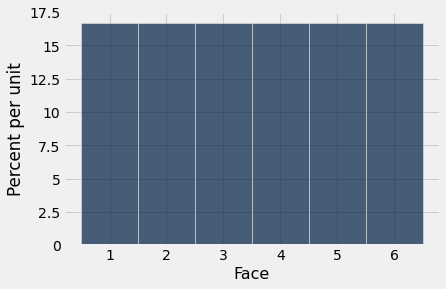

In [53]:
die.hist(bins=np.arange(0.5, 7.5, 1))

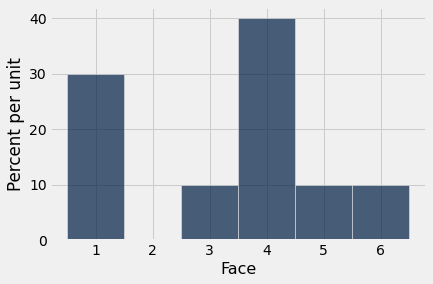

In [61]:
die.sample(10).hist(bins=np.arange(0.5, 7.5, 1))

(back to slides)

# Law of large numbers

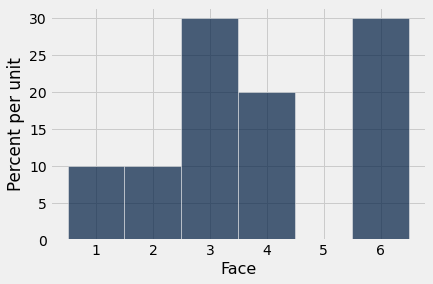

In [64]:
die.sample(10).hist(bins=np.arange(0.5, 7.5, 1))

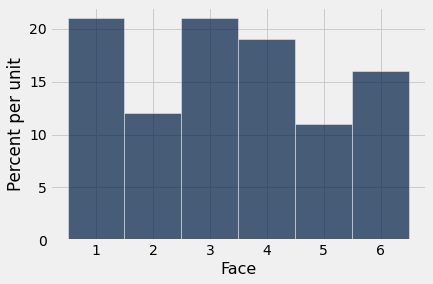

In [68]:
die.sample(100).hist(bins=np.arange(0.5, 7.5, 1))

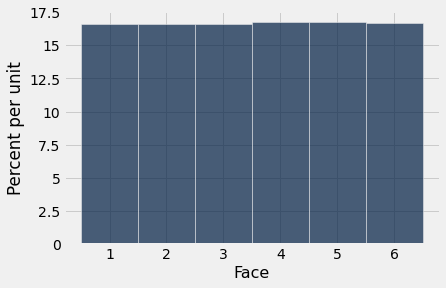

In [80]:
die.sample(int(1e6)).hist(bins=np.arange(0.5, 7.5, 1))

In [ ]:
die = np.arange(1,7)
die

### Let's roll a dice 10, 50, and 10,000 times and see the distribution of rolls

In [ ]:
for i in make_array(10, 50, 10000):
    Table().with_columns('roll', np.random.choice(die,i)).hist('roll', bins=np.arange(0.5,7.5, 1))

### Repeat the above multiple times and see the differences

# Simulating Statistics 

### Average time of all delays

In [ ]:
np.median(united.column('Delay'))

### Average time of 10 random delays

In [ ]:
np.median(united.sample(10).column('Delay'))

In [ ]:
np.median(united.sample(10).column('Delay'))

#### Write a function that given a specified sample size called `size`, returns the median of those `size` samples

What type is `size` here?

In [ ]:
def sample_median(size):
    return ... 

<details>,
<summary>Solution</summary>
  np.median(united.sample(size).column('Delay'))
</details>


In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_11_completed.ipynb", pdf=False)